In [22]:
import data
import preprocessing
import exportation
import settings

import joblib

import matplotlib.pyplot as plt
import matplotlib as mplt
import seaborn as sns
import pandas as pd
import numpy as np


# *****************************************************************
# ------------------------ Program parameters ----------------------
# *****************************************************************

enseigne = 'Auchan'

# Exploration des données d'entrainement

In [23]:
df = data.data_extraction.BDD_Promo('BigQuery', enseigne)


Querying BigQuery for training data...
Querying and loading time = 94.16 s 
Request finished



In [24]:
#Data Cleaning
df_clean,id_cols = preprocessing.training_set_preprocessing.training_set_cleaning(df)

print('Dataframe shape :', df_clean.shape)

Cleaning Data...
Data cleansing done

Dataframe shape : (215431, 34)


In [25]:
df_clean.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Annee,215431,3,2019-01-01,78095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SemaineDebut,215431,NaN,NaN,NaN,26.0548,15.2425,1,12,27,40,52
NomOpe,215431,127,GRAND RDV 6,12494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateDebutConso,215431,122,2017-11-03,12494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateFinConso,215431,121,2017-11-09,12494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Enseigne,215431,1,AUCHAN,215431,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DirectionRegionale,215431,4,DFR DR NORD EST,94377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZoneCVR,215431,23,DFR CVR 21,27267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SecteurCM,215431,58,TERRITOIRE 2220,9085,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NomMagasin,215431,120,10 - AUCHAN LOUVROIL,1865,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_clean.isna().sum()

Annee                               0
SemaineDebut                        0
NomOpe                              0
DateDebutConso                      0
DateFinConso                        0
Enseigne                            0
DirectionRegionale                  0
ZoneCVR                             0
SecteurCM                           0
NomMagasin                          0
Superficie                       5463
CodeMagasin                         0
CAMagasin                           0
IndiceMagPromophile                 0
CodeSAPProduit                      0
EANProduit                          0
NomProduit                          0
UmbrellaBrand                       0
NBPotsParUC                         0
FlagInno                            0
DureeEnJoursDepuisLancement         0
TotalVentesMarqueUC              1673
IndiceMarquePromophile           1673
TotalVentesProductBrandEnUC     32824
IndiceProductBrandPromophile    32824
Mecanique                           0
EncodageMeca

## Visualisation

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

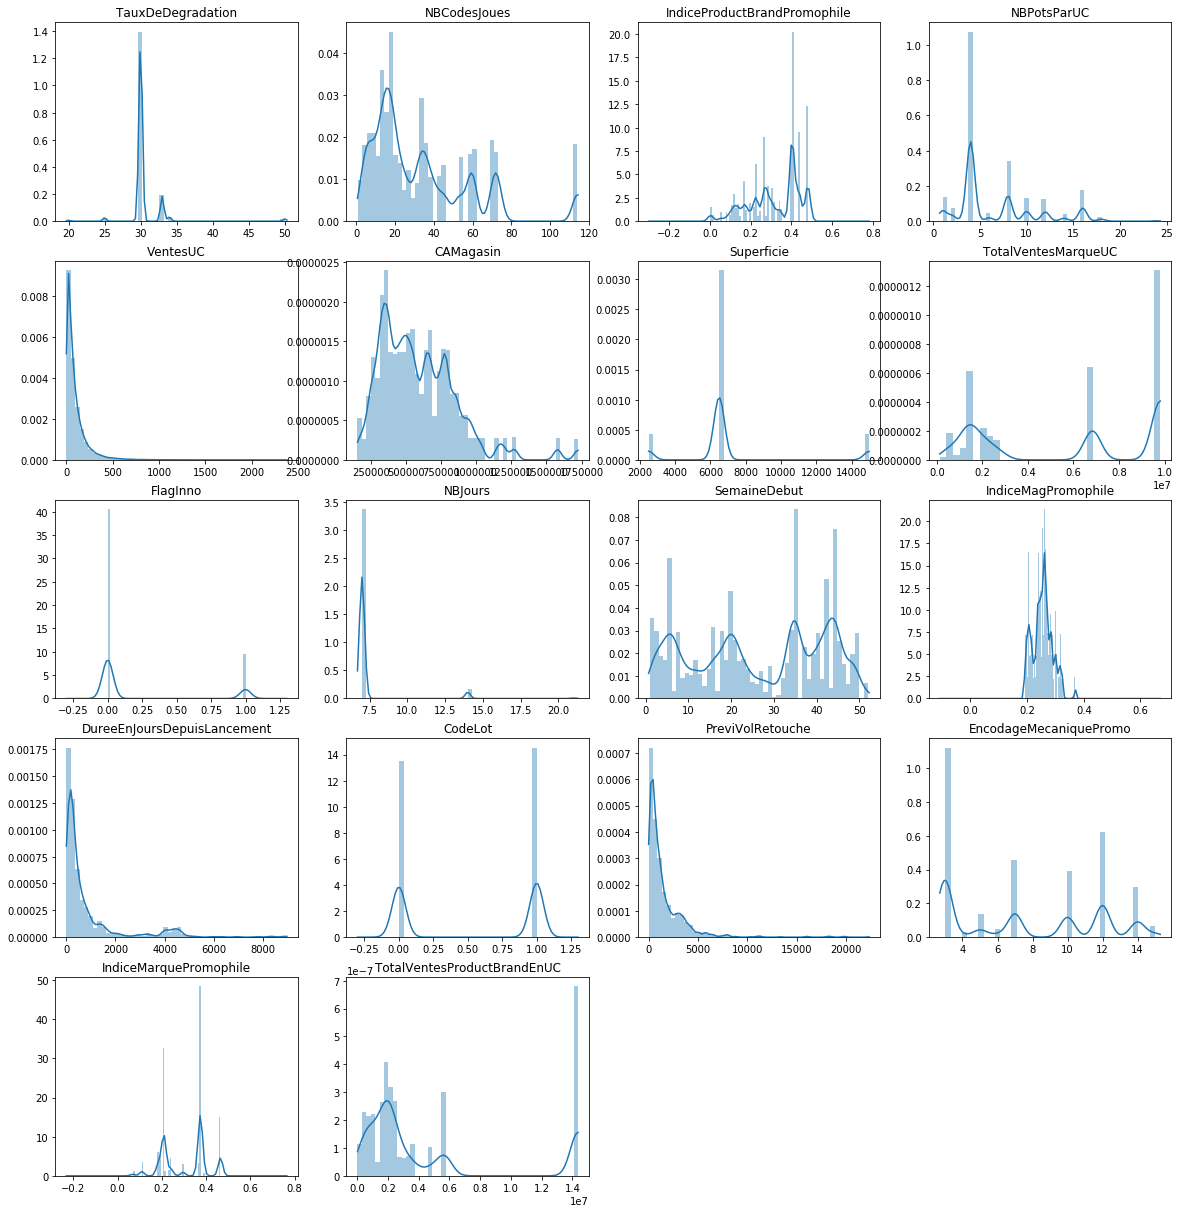

In [31]:
fig = plt.figure
fig(figsize =(20,30))
i=0

df_clean = df_clean.dropna()

for col in set(df_clean.columns) - set(id_cols):
    plt.subplot(7, 4, i + 1)
    plt.title(col)
    sns.distplot(df_clean[[col]] , kde_kws = {'bw':0.1})
    i+=1

plt.tight_layout

## Analyse de Correlation

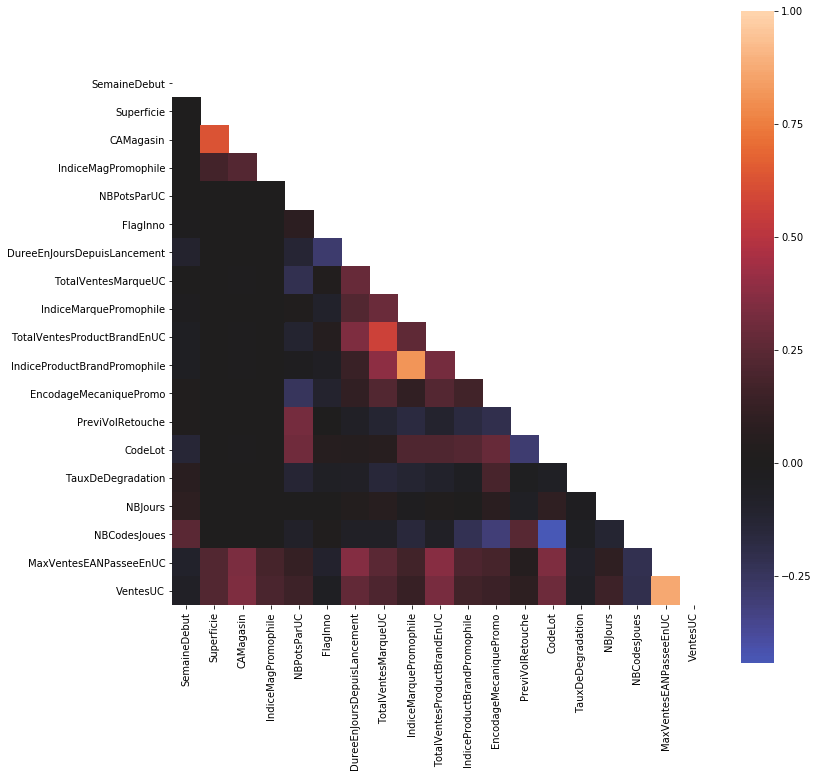

In [32]:
X_corr = df_clean.corr()
mask = np.zeros_like(X_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize = (12,12))

sns.heatmap(X_corr, center=0, square = True, mask = mask)

## Création du DataFrame encodée et transformé pour entrainement

Transforming skewed columns for Normal distribution approximation...


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

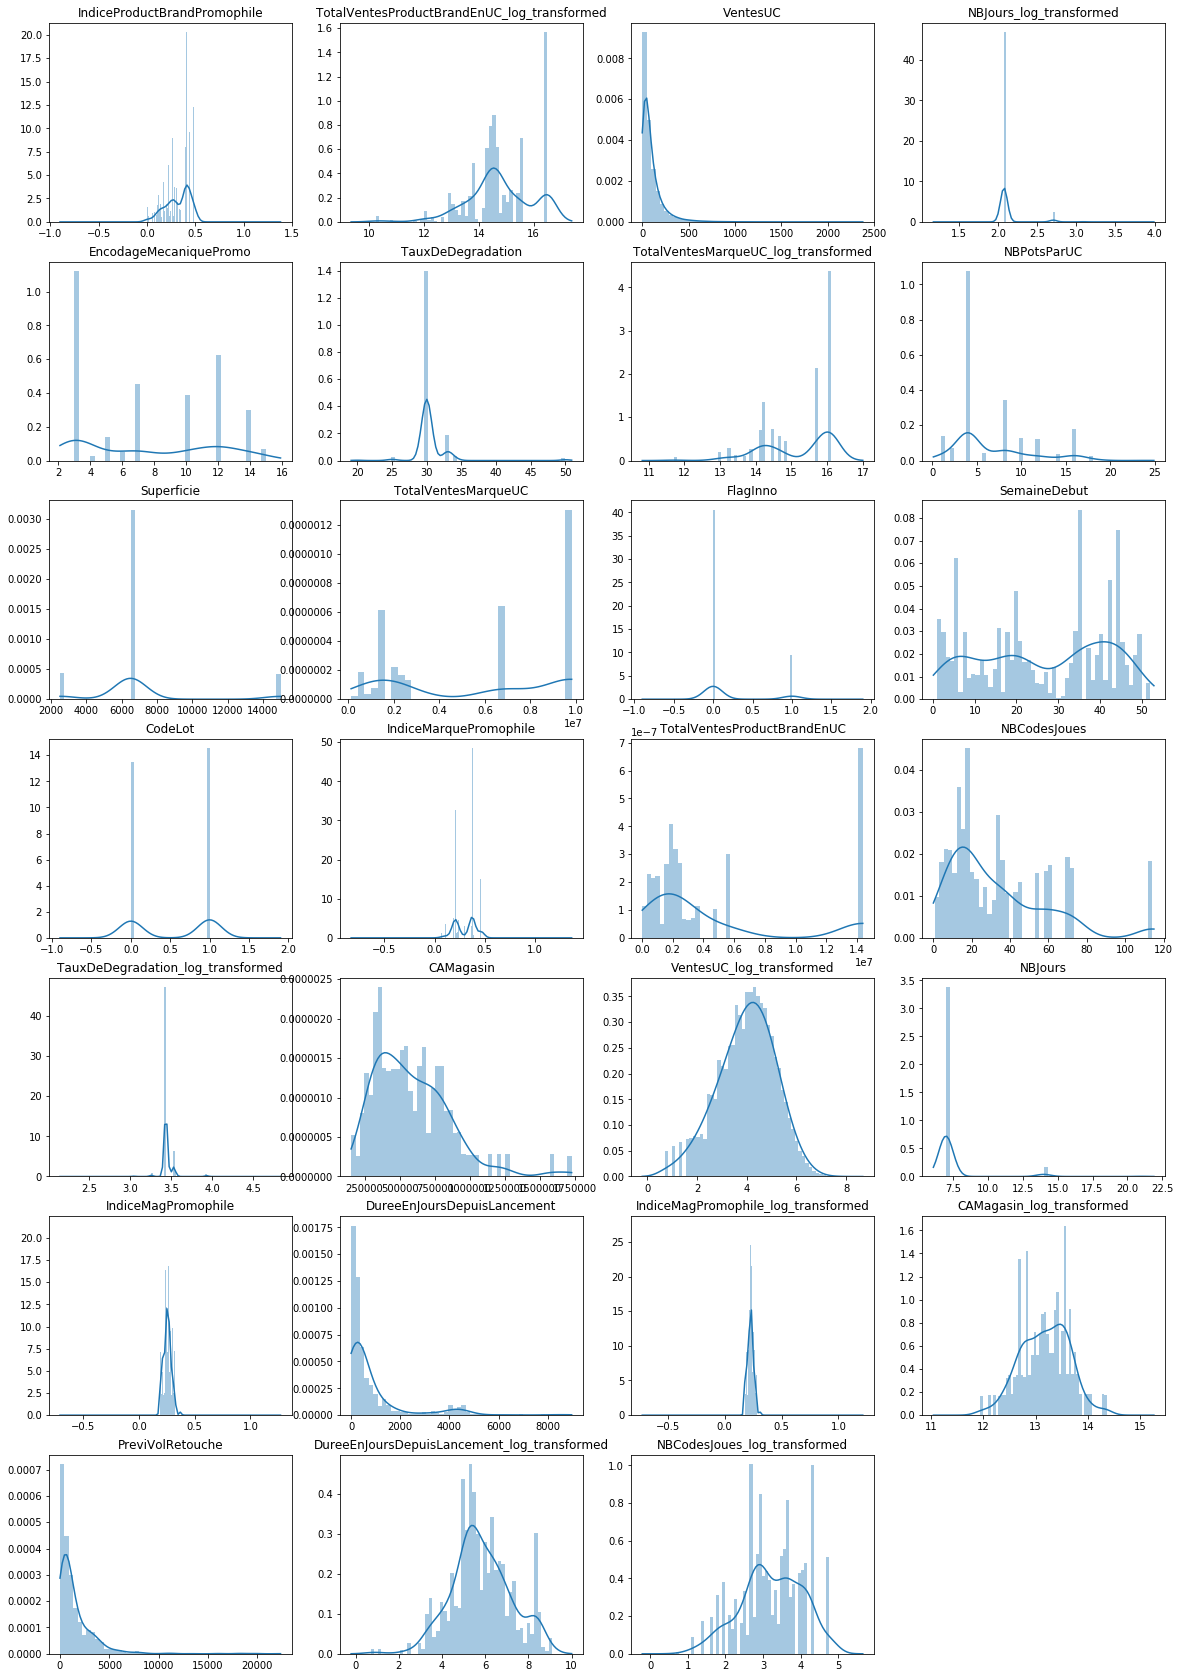

In [34]:
df_transform = preprocessing.training_set_preprocessing.data_forward_transform(df_clean)

fig = plt.figure
fig(figsize =(20,30))
i=0
for col in set(df_transform.columns) - set(id_cols):
    plt.subplot(7, 4, i + 1)
    plt.title(col)
    sns.distplot(df_transform[[col]],  kde_kws={'bw':0.3})
    i+=1

plt.tight_layout

In [ ]:
X_corr = df_transform.corr()
mask = np.zeros_like(X_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize = (12,12))

sns.heatmap(X_corr, center=0, square = True, mask = mask)

## Encodage des données catégoriques

In [ ]:
df_encoded = preprocessing.training_set_preprocessing.feature_encoding(df_clean)

df_encoded.isna().sum()

# test partie prediction

In [11]:
import data
import model_training
import preprocessing
import predictions
import exportation
import settings

import joblib
import string

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# *****************************************************************
# ------------------------ Program parameters ----------------------
# *****************************************************************


enseigne = settings.enseigne


In [12]:
#Load trained model
gbm = joblib.load('trained_XBG_'+enseigne+'.joblib')
print('Predictions will be performed using trained_XGB_'+enseigne+'.joblib regression model')
    
#Get data to perform prediction on
F = data.data_extraction.Forecast('BigQuery', enseigne)
    
F.head()


Predictions will be performed using trained_XGB_Auchan.joblib regression model


Sur quelle OP voulez-vous réaliser des précos ? (Entrer le nom de l'OP à l'identique de Recas CAS) SEPTEMBRE N° 1 PDT L Tract - 2019
Quelle est la date de début de conso de l'OP ? (Entrer la date au format AAAA-MM-JJ) 2019-09-04



Querying BigQuery for prediction data...
Querying and loading time = 26.27 s 
Request finished



,Annee,SemaineDebut,NomOpe,DateDebutConso,DateFinConso,Enseigne,DirectionRegionale,ZoneCVR,SecteurCM,NomMagasin,...,Mecanique,EncodageMecaniquePromo,BaselineOSA,PreviVol,CodeLot,TauxDeDegradation,NBJours,NBCodesJoues,MaxVentesEANPasseeEnUC,VentesUC
0,2019-01-01,35,SEPTEMBRE N° 1 PDT L Tract - 2019,2019-09-04,2019-09-10,AUCHAN,DFR DR NORD EST,DFR CVR 21,TERRITOIRE 2120,61 - AUCHAN FACHES THUMESNIL,...,Lot virtuel 2ème à -60%,7,3.700000,21.33,0,30.0,6,60,162,73
1,2019-01-01,35,SEPTEMBRE N° 1 PDT L Tract - 2019,2019-09-04,2019-09-10,AUCHAN,DFR DR NORD EST,DFR CVR 27,TERRITOIRE 2710,90 - AUCHAN LE KREMLIN BICETRE,...,Lot virtuel 2ème à -60%,7,2.850000,21.33,0,30.0,6,60,162,10
2,2019-01-01,35,SEPTEMBRE N° 1 PDT L Tract - 2019,2019-09-04,2019-09-10,AUCHAN,DFR DR GRAND OUEST,DFR CVR 12,TERRITOIRE 1240,140 - AUCHAN CHASSENEUIL DU POITOU,...,Lot virtuel 2ème à -60%,7,1.259259,21.33,0,30.0,6,60,162,21
3,2019-01-01,35,SEPTEMBRE N° 1 PDT L Tract - 2019,2019-09-04,2019-09-10,AUCHAN,DFR DR GRAND OUEST,DFR CVR 17,TERRITOIRE 1750,105 - AUCHAN CALAIS,...,Lot virtuel 2ème à -60%,7,2.444444,21.33,0,30.0,6,60,162,52
4,2019-01-01,35,SEPTEMBRE N° 1 PDT L Tract - 2019,2019-09-04,2019-09-10,AUCHAN,DFR DR SUD EST,DFR CVR 33,TERRITOIRE 3310,18 - AUCHAN ST GENIS LAVAL,...,Lot virtuel 2ème à -60%,7,3.450000,21.33,0,30.0,6,60,162,95


In [13]:
#Data Cleaning
F = preprocessing.training_set_preprocessing.training_set_cleaning(F)
F_clean = preprocessing.training_set_preprocessing.training_set_cleaning(F)

F_clean.head()

Cleaning Data...
Data cleansing done



,SemaineDebut,Superficie,CAMagasin,IndiceMagPromophile,NBPotsParUC,FlagInno,DureeEnJoursDepuisLancement,TotalVentesMarqueUC,IndiceMarquePromophile,TotalVentesProductBrandEnUC,IndiceProductBrandPromophile,EncodageMecaniquePromo,BaselineOSA,PreviVol,CodeLot,TauxDeDegradation,NBJours,NBCodesJoues,VentesUC
0,35,6500.0,869572.75,0.256591,12,0,1982,6890084,0.210435,709139,0.223828,7,3.700000,21.33,0,30.0,6,60,73
1,35,6500.0,734156.35,0.274311,12,0,1982,6890084,0.210435,709139,0.223828,7,2.850000,21.33,0,30.0,6,60,10
2,35,2500.0,274914.24,0.257851,12,0,1982,6890084,0.210435,709139,0.223828,7,1.259259,21.33,0,30.0,6,60,21
3,35,6500.0,625465.95,0.305863,12,0,1982,6890084,0.210435,709139,0.223828,7,2.444444,21.33,0,30.0,6,60,52
4,35,6500.0,799079.98,0.194555,12,0,1982,6890084,0.210435,709139,0.223828,7,3.450000,21.33,0,30.0,6,60,95


In [14]:
#Data Transforamtion pour normalisation des colonnes Skewed
F_transform = preprocessing.training_set_preprocessing.data_forward_transform(F_clean)
    
#Data Encoding
print('\nPerforming training data encoding')
F_encoded = preprocessing.training_set_preprocessing.feature_encoding(F_transform)
print('Data encoding finished\n')

Transforming skewed columns for Normal distribution approximation...

Performing training data encoding
Feature encoding...
Feature encoding done

Data encoding finished



In [15]:
F_encoded.head()

,SemaineDebut,Superficie,NBPotsParUC,FlagInno,IndiceMarquePromophile,IndiceProductBrandPromophile,EncodageMecaniquePromo,CodeLot,VentesUC,CAMagasin_log_transformed,BaselineOSA_log_transformed,DureeEnJoursDepuisLancement_log_transformed,TotalVentesMarqueUC_log_transformed,TotalVentesProductBrandEnUC_log_transformed,PreviVol_log_transformed,IndiceMagPromophile_log_transformed,NBCodesJoues_log_transformed,NBJours_log_transformed,TauxDeDegradation_log_transformed
0,35,6500.0,12,0,0.210435,0.223828,7,0,73,13.675758,1.547563,7.592366,15.745594,13.471808,3.105931,0.228402,4.110874,1.94591,3.433987
1,35,6500.0,12,0,0.210435,0.223828,7,0,10,13.506479,1.348073,7.592366,15.745594,13.471808,3.105931,0.242405,4.110874,1.94591,3.433987
2,35,2500.0,12,0,0.210435,0.223828,7,0,21,12.524218,0.815037,7.592366,15.745594,13.471808,3.105931,0.229405,4.110874,1.94591,3.433987
3,35,6500.0,12,0,0.210435,0.223828,7,0,52,13.346254,1.236763,7.592366,15.745594,13.471808,3.105931,0.266864,4.110874,1.94591,3.433987
4,35,6500.0,12,0,0.210435,0.223828,7,0,95,13.591218,1.492904,7.592366,15.745594,13.471808,3.105931,0.177773,4.110874,1.94591,3.433987


In [17]:
_,features = preprocessing.training_set_preprocessing.preco_features(F_encoded)
    
#Perform predictions
y_pred = predictions.perform_predictions(F_encoded,features,gbm)
y_pred = np.round_(y_pred, decimals = 0)
    
df_pred = pd.DataFrame(data = y_pred, columns = ['PreconisationVentesUC'])    #construction du DataFrame pour concatenation des données de préco
    
#Construction du DataFrame final des preco
Precos = pd.concat([F,df_pred], axis = 1)
Precos = Precos.dropna()
    
Precos.to_csv('../Precos_OSA/data/test_predictions_precos.csv')


Performing predictions from the trained model

Predictions finished
